In [33]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [34]:
data = pd.read_excel('data_51_to_100.xlsx')
data.head()

,Unnamed: 0,Address,Area,Price per m2,Room,WC,Price
0,0,"Gò Vấp, Hồ Chí Minh",56 m²,23.93 tr/m²,2.0,3.0,1.34 tỷ
1,1,"Quận 5, Hồ Chí Minh",36 m²,244.44 tr/m²,NaN,NaN,8.8 tỷ
2,2,"Bình Thạnh, Hồ Chí Minh",55 m²,26.36 tr/m²,3.0,3.0,1.45 tỷ
3,3,"Quận 2, Hồ Chí Minh",62.5 m²,25.76 tr/m²,3.0,3.0,1.61 tỷ
4,4,"Bình Tân, Hồ Chí Minh",64 m²,93.75 tr/m²,NaN,NaN,6 tỷ


In [35]:
data1 = pd.read_excel('data_1_to_50.xlsx')
data1.head()

,Unnamed: 0,Address,Area,Price per m2,Room,WC,Price
0,0,"·\nQuận 9, Hồ Chí Minh",120 m²,91.67 tr/m²,6.0,6.0,11 tỷ
1,1,"·\nTân Bình, Hồ Chí Minh",34.5 m²,162.32 tr/m²,3.0,2.0,5.6 tỷ
2,2,"·\nHóc Môn, Hồ Chí Minh",156 m²,16.67 tr/m²,4.0,4.0,2.6 tỷ
3,3,"·\nHóc Môn, Hồ Chí Minh",130 m²,21.54 tr/m²,3.0,3.0,2.8 tỷ
4,4,"·\nBình Tân, Hồ Chí Minh",87 m²,91.95 tr/m²,NaN,NaN,8 tỷ


In [36]:
frames = [data, data1]

df = pd.concat(frames,ignore_index=True)

In [37]:
df.head()

,Unnamed: 0,Address,Area,Price per m2,Room,WC,Price
0,0,"Gò Vấp, Hồ Chí Minh",56 m²,23.93 tr/m²,2.0,3.0,1.34 tỷ
1,1,"Quận 5, Hồ Chí Minh",36 m²,244.44 tr/m²,NaN,NaN,8.8 tỷ
2,2,"Bình Thạnh, Hồ Chí Minh",55 m²,26.36 tr/m²,3.0,3.0,1.45 tỷ
3,3,"Quận 2, Hồ Chí Minh",62.5 m²,25.76 tr/m²,3.0,3.0,1.61 tỷ
4,4,"Bình Tân, Hồ Chí Minh",64 m²,93.75 tr/m²,NaN,NaN,6 tỷ


In [38]:
len(df)

2000

In [39]:
df=df.drop(columns=['Unnamed: 0'])

df.head()

,Address,Area,Price per m2,Room,WC,Price
0,"Gò Vấp, Hồ Chí Minh",56 m²,23.93 tr/m²,2.0,3.0,1.34 tỷ
1,"Quận 5, Hồ Chí Minh",36 m²,244.44 tr/m²,NaN,NaN,8.8 tỷ
2,"Bình Thạnh, Hồ Chí Minh",55 m²,26.36 tr/m²,3.0,3.0,1.45 tỷ
3,"Quận 2, Hồ Chí Minh",62.5 m²,25.76 tr/m²,3.0,3.0,1.61 tỷ
4,"Bình Tân, Hồ Chí Minh",64 m²,93.75 tr/m²,NaN,NaN,6 tỷ


In [40]:
df.columns

Index(['Address', 'Area', 'Price per m2', 'Room', 'WC', 'Price'], dtype='object')

In [41]:
#kiểm tra số lượng NULL
df.isnull().sum()

Address           0
Area              0
Price per m2    148
Room            397
WC              546
Price             0
dtype: int64

In [42]:
# đếm các giá trị trong cột Price
df['Price'].value_counts()

Giá thỏa thuận    148
4.5 tỷ             34
8.5 tỷ             33
3.5 tỷ             33
6.5 tỷ             32
                 ... 
1.15 tỷ             1
980 triệu           1
26 tỷ               1
12.3 tỷ             1
1.34 tỷ             1
Name: Price, Length: 429, dtype: int64

In [43]:
# xóa column Price per m2, vì cloumn này
# là của column Price / column Area
df1 = df[['Address','Area','Room','WC','Price']]
# xóa các row có price là giá thoat thuận
df1 = df1[df1.Price != 'Giá thỏa thuận']
len(df1)

1852

In [44]:
df1.head()

,Address,Area,Room,WC,Price
0,"Gò Vấp, Hồ Chí Minh",56 m²,2.0,3.0,1.34 tỷ
1,"Quận 5, Hồ Chí Minh",36 m²,NaN,NaN,8.8 tỷ
2,"Bình Thạnh, Hồ Chí Minh",55 m²,3.0,3.0,1.45 tỷ
3,"Quận 2, Hồ Chí Minh",62.5 m²,3.0,3.0,1.61 tỷ
4,"Bình Tân, Hồ Chí Minh",64 m²,NaN,NaN,6 tỷ


In [45]:
# clean data
# xóa tên thành phố, chỉ còn tên quận hoặc huyện
def remove_detail_address(text):
    text = re.sub("·\n", "", text)
    text = re.sub(", Hồ Chí Minh","", text)
    return text

# xóa m2 trong diện tích và chuyễn sang kiểu float
def remove_m2(text):
    text = re.sub(" m²", "", text)
    num = float(text)
    return num

# chuyển giá về cùng 1 định giá (TỶ)
def convert_price(text):
    x = re.search("tỷ", text)
    if x:
        text = re.sub(" tỷ",'', text)
        num = float(text)
        return num
    else:
        text = re.sub(" triệu","",text)
        num = float(text)
        return num

In [46]:
df1['Address'] = df1['Address'].apply(remove_detail_address)
df1['Area']=df1['Area'].apply(remove_m2)
df1['Price']=df1['Price'].apply(convert_price)
df1.head()

,Address,Area,Room,WC,Price
0,Gò Vấp,56.0,2.0,3.0,1.34
1,Quận 5,36.0,NaN,NaN,8.80
2,Bình Thạnh,55.0,3.0,3.0,1.45
3,Quận 2,62.5,3.0,3.0,1.61
4,Bình Tân,64.0,NaN,NaN,6.00


<Axes: ylabel='Frequency'>

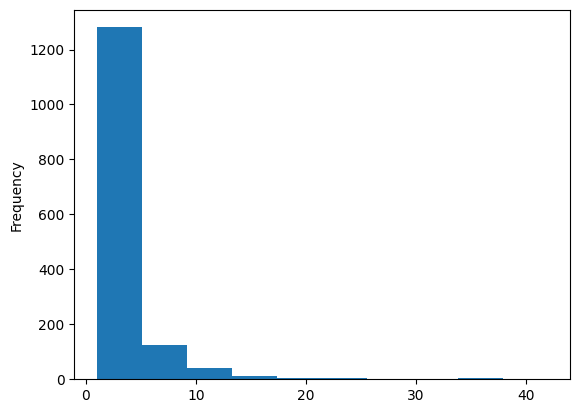

In [47]:
df1['Room'].plot(kind="hist")

<Axes: ylabel='Frequency'>

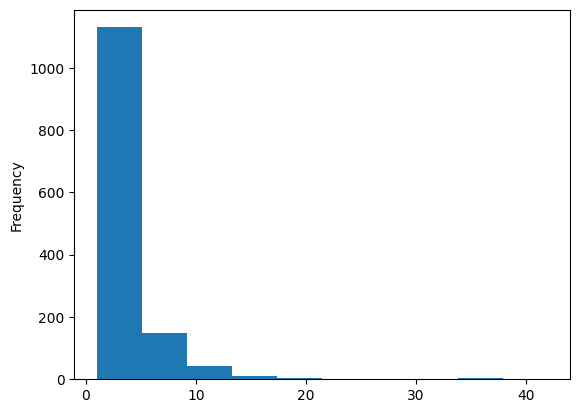

In [48]:
df1['WC'].plot(kind="hist")

In [49]:
print('Trung bình của cột Room: ',df1['Room'].mean())
print('Trung vị của cột Room: ',df1['Room'].median())
max_room = df1['Room'].max()
print('Max of Room column: ',max_room)
min_room = df1['Room'].min()
print('Min of Room column: ',min_room)

Trung bình của cột Room:  4.164745762711864
Trung vị của cột Room:  4.0
Max of Room column:  42.0
Min of Room column:  1.0


In [50]:
print('Trung bình của cột WC: ',df1['WC'].mean())
print('Trung vị của cột WC: ',df1['WC'].median())
max_wc = df1['WC'].max()
print('Max of WC column: ',max_wc)
min_wc = df1['WC'].min()
print('Min of WC column: ',min_wc)

Trung bình của cột WC:  4.0936802973977695
Trung vị của cột WC:  3.0
Max of WC column:  42.0
Min of WC column:  1.0


In [51]:
# chèn data bị miss bằng median value
# sử dụng giá trị median vì giữa 2 giá trị mean và median không chênh lệch nhiều
# và feature ROOM và WC là số dương, do đó chọn median là hợp lí
df1['Room'].fillna(df1['Room'].median(), inplace = True)
df1['WC'].fillna(df1['WC'].median(), inplace = True)
df1.head()

,Address,Area,Room,WC,Price
0,Gò Vấp,56.0,2.0,3.0,1.34
1,Quận 5,36.0,4.0,3.0,8.80
2,Bình Thạnh,55.0,3.0,3.0,1.45
3,Quận 2,62.5,3.0,3.0,1.61
4,Bình Tân,64.0,4.0,3.0,6.00


In [61]:
len(df1)

1852

In [52]:
# df1.to_excel('after_preprocessing.xlsx')

# Data visualization

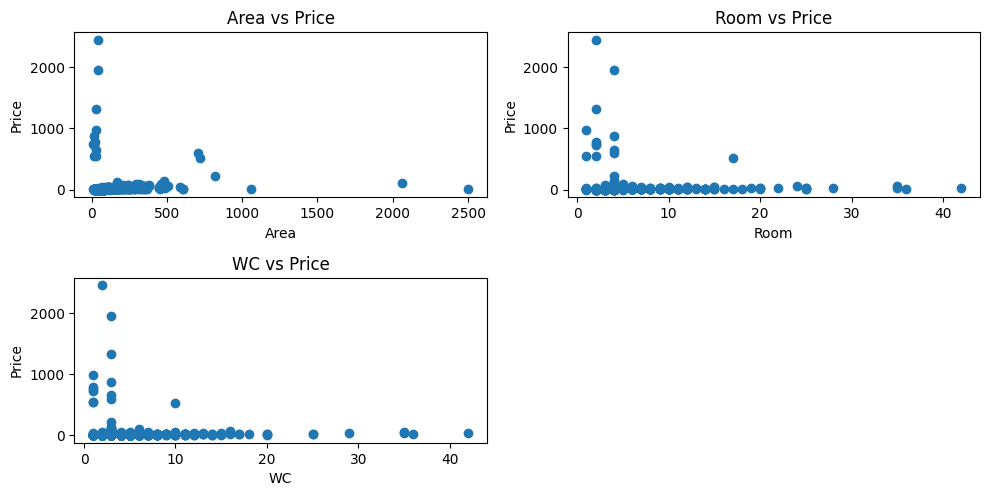

In [53]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df1[x],df1['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('Area', 1)
scatter('Room', 2)
scatter('WC', 3)

plt.tight_layout()

In [58]:
#check các row có giá trên 500 tỉ
max_price_row = df1[df1.Price > 500]
print(len(max_price_row))
(max_price_row)


13


,Address,Area,Room,WC,Price
122,Quận 3,720.0,17.0,10.0,523.0
714,Bình Tân,10.0,2.0,1.0,750.0
853,Quận 12,28.0,1.0,1.0,980.0
1024,Quận 12,28.0,4.0,3.0,650.0
1106,Quận 7,28.0,2.0,1.0,550.0
1258,Nhà Bè,21.0,2.0,1.0,780.0
1289,Quận 12,18.0,1.0,1.0,550.0
1409,Quận 12,40.0,4.0,3.0,1950.0
1410,Quận 12,32.0,2.0,3.0,1320.0
1411,Quận 12,40.0,2.0,2.0,2450.0


In [60]:
# add các row có giá trị ảo vào virtual_price_row
virtual_price_row = max_price_row.drop([122, 1893])
print(len(virtual_price_row))
virtual_price_row

11


,Address,Area,Room,WC,Price
714,Bình Tân,10.0,2.0,1.0,750.0
853,Quận 12,28.0,1.0,1.0,980.0
1024,Quận 12,28.0,4.0,3.0,650.0
1106,Quận 7,28.0,2.0,1.0,550.0
1258,Nhà Bè,21.0,2.0,1.0,780.0
1289,Quận 12,18.0,1.0,1.0,550.0
1409,Quận 12,40.0,4.0,3.0,1950.0
1410,Quận 12,32.0,2.0,3.0,1320.0
1411,Quận 12,40.0,2.0,2.0,2450.0
1423,Quận 12,15.0,4.0,3.0,870.0


In [63]:
# merge hai DataFrames dựa trên tất cả các cột
merged = pd.merge(df1, virtual_price_row, how='outer', indicator=True)

# delete row of virtual_price_row cos trong df1
df1 = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
len(df1)

1841

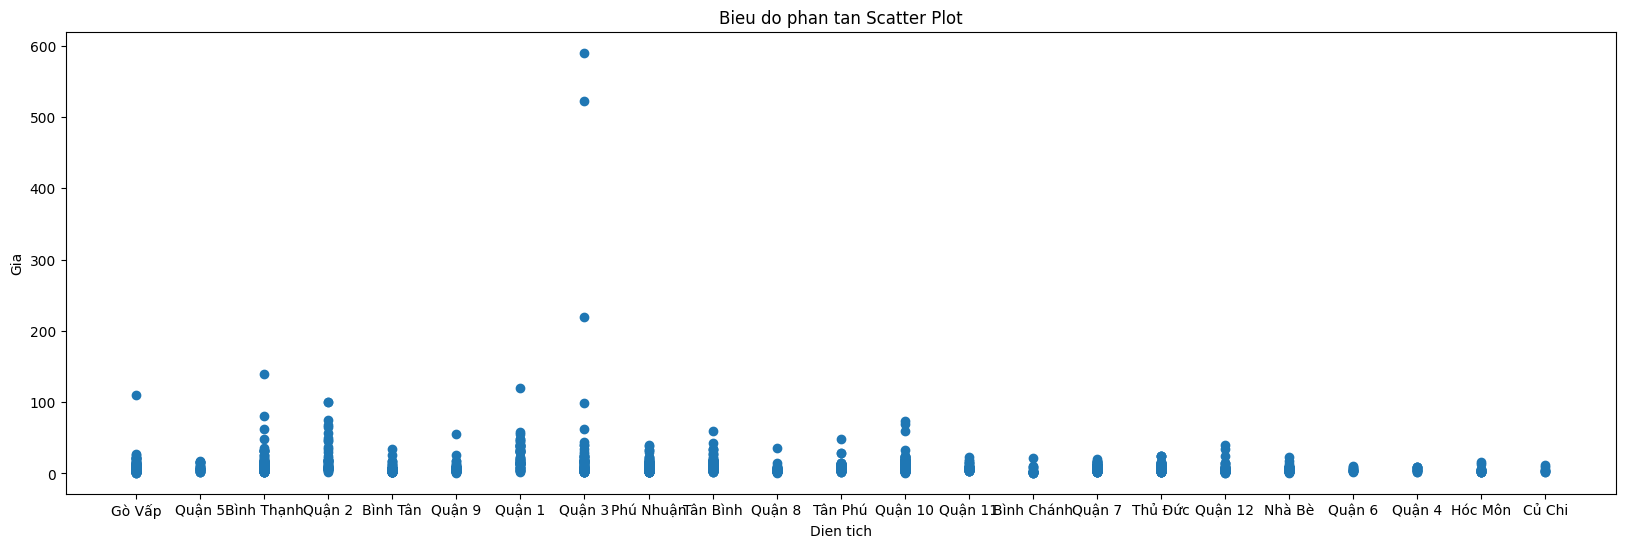

In [66]:
plt.figure(figsize=(20,6))
plt.title("Bieu do phan tan Scatter Plot")
plt.xlabel("Dien tich")
plt.ylabel("Gia")
plt.scatter(df1['Address'], df1['Price'])

In [65]:
df1.to_excel('1_after_preprocessing.xlsx')
